# Model Testing 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dataset_df=pd.read_csv('grains.csv',index_col='Unnamed: 0')
dataset_df=dataset_df.sample(frac=1).reset_index(drop=True)

In [3]:
def plot(X,y):
    fig = plt.figure(figsize=(7,7))
    plt.plot(X[y==0,0],X[y==0,1],'ro',mec='k')
    plt.plot(X[y==1,0],X[y==1,1],'go',mec='k')
    plt.xlabel('Score on exam 1')
    plt.ylabel('Score on exam 2')
    plt.legend(["Failed","Passed"])
    plt.show()

In [4]:
dataset_df.head()

,Unnamed: 0.1,Height,Width,Area,Perimeter,A/P,A/(A+P),A/(W*H),Diameter,Label
0,545,71.344236,30.528675,1627.0,177.480229,9.167218,0.901645,0.747000,45.514401,0
1,60,62.968246,18.439089,889.5,145.982756,6.093185,0.859020,0.766099,33.653329,0
2,463,64.000000,23.000000,1184.5,151.154328,7.836362,0.886831,0.804688,38.834936,0
3,914,68.796802,23.323808,1225.0,164.994947,7.424470,0.881298,0.763429,39.493271,0
4,694,85.883642,25.059928,1691.5,202.551296,8.350971,0.893059,0.785926,46.407809,0


In [5]:
dataset_df

,Unnamed: 0.1,Height,Width,Area,Perimeter,A/P,A/(A+P),A/(W*H),Diameter,Label
0,545,71.344236,30.528675,1627.0,177.480229,9.167218,0.901645,0.747000,45.514401,0
1,60,62.968246,18.439089,889.5,145.982756,6.093185,0.859020,0.766099,33.653329,0
2,463,64.000000,23.000000,1184.5,151.154328,7.836362,0.886831,0.804688,38.834936,0
3,914,68.796802,23.323808,1225.0,164.994947,7.424470,0.881298,0.763429,39.493271,0
4,694,85.883642,25.059928,1691.5,202.551296,8.350971,0.893059,0.785926,46.407809,0
...,...,...,...,...,...,...,...,...,...,...
2241,401,72.111026,26.627054,1468.0,172.308656,8.519595,0.894954,0.764542,43.233270,0
2242,500,77.420927,20.248457,1165.5,176.551298,6.601481,0.868447,0.743467,38.522210,0
2243,228,79.075913,29.681644,1787.5,196.894443,9.078469,0.900779,0.761577,47.706558,0
2244,509,55.470713,21.633308,917.0,136.024385,6.741438,0.870825,0.764157,34.169587,0


In [6]:
X = np.array(dataset_df[["Height","Width","Area",'Perimeter','A/P',
       'A/(A+P)', 'A/(W*H)', 'Diameter']])
y = np.array(dataset_df["Label"]).reshape(-1,1)

In [7]:
y=y.ravel()

In [8]:
X.shape

(2246, 8)

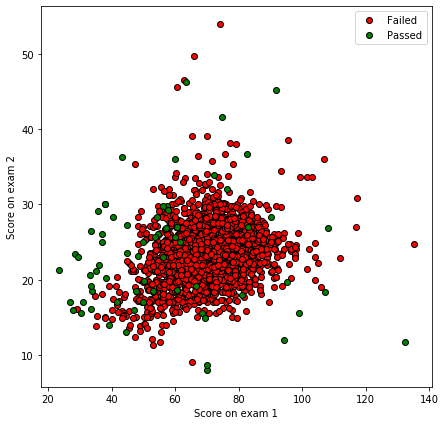

In [9]:
plot(X,y)

# SVM

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#print(test_x.size)

In [11]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid',probability=True)
svclassifier.fit(X_train,y_train.ravel())

SVC(kernel='sigmoid', probability=True)

In [12]:
y_prob=svclassifier.predict_proba(X_test) 

In [13]:
y_pred = svclassifier.predict(X_test)
#print(y_test)

In [14]:
train_y_pred=svclassifier.predict(X_train)

In [15]:
print(np.mean(train_y_pred==y_train))

0.9716035634743875


In [16]:
print(np.mean(y_pred==y_test))

0.9644444444444444


# Multinomial NaviBayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [19]:
clf.fit(X_train, y_train)

MultinomialNB()

In [20]:
pred_y_test=clf.predict(X_test)

In [21]:
pred_y_train=clf.predict(X_train)

In [22]:
print(np.mean(pred_y_test==y_test))

0.88


In [23]:
print(np.mean(pred_y_train==y_train))

0.8841870824053452


# Bernoulli's

In [24]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()

In [25]:
clf.fit(X, y)

BernoulliNB()

In [26]:
pred_y_test=clf.predict(X_test)

In [27]:
pred_y_train=clf.predict(X_train)

In [28]:
print(np.mean(pred_y_test==y_test))

0.9755555555555555


In [29]:
print(np.mean(pred_y_train==y_train))

0.9688195991091314


# Gaussian

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
clf= GaussianNB()

In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [34]:
X_new= power.fit_transform(X)

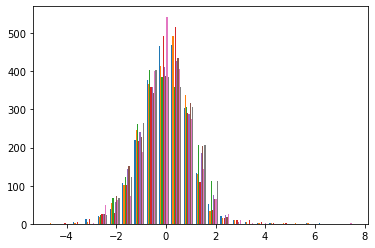

In [35]:
plt.hist(X_new, bins=25)
plt.show()

In [36]:
clf.fit(X_new, y)

GaussianNB()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20)

In [38]:
pred_y_test=clf.predict(X_test)

In [39]:
pred_y_train=clf.predict(X_train)

In [40]:
print(np.mean(pred_y_test==y_test))

0.9066666666666666


In [41]:
print(np.mean(pred_y_train==y_train))

0.9187082405345212


# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
clf = KNeighborsClassifier(n_neighbors=3)

In [44]:
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [45]:
pred_y_test=clf.predict(X_test)

In [46]:
pred_y_train=clf.predict(X_train)

In [47]:
print(np.mean(pred_y_test==y_test))

0.02666666666666667


In [48]:
print(np.mean(pred_y_train==y_train))

0.030623608017817373
